## Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.9849388888888889


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.28, 0.72]])

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\Users\Himanshu kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


No we will focus on selecting the best threshold for maximum accuracy

In [22]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9852888888888889


In [30]:
pred

[0      0.97
 1      0.00
 2      0.95
 3      0.93
 4      0.57
        ... 
 595    0.00
 596    0.01
 597    0.98
 598    0.02
 599    1.00
 Length: 600, dtype: float64,
 0      0.991873
 1      0.000008
 2      0.966763
 3      0.761896
 4      0.779209
          ...   
 595    0.024263
 596    0.000003
 597    0.984400
 598    0.001157
 599    0.989543
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [31]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991873,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.95,0.966763,0.538202,0.8
3,0.93,0.761896,0.509875,0.8
4,0.57,0.779209,0.490344,0.4
...,...,...,...,...
595,0.00,0.024263,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.98,0.984400,0.532403,1.0
598,0.02,0.001157,0.441720,0.2


In [32]:
final_prediction

0      0.880265
1      0.115823
2      0.813741
3      0.750443
4      0.559888
         ...   
595    0.121346
596    0.112845
597    0.874201
598    0.165719
599    0.837358
Length: 600, dtype: float64

In [38]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.9134408 , 0.9048264 , 0.90327496, 0.79699927,
       0.79659566, 0.79143197, 0.79056746, 0.78141258, 0.77827862,
       0.77640951, 0.77286546, 0.73297432, 0.73133029, 0.71472284,
       0.71139901, 0.66856159, 0.66493002, 0.60520014, 0.59983761,
       0.59733772, 0.59670593, 0.58064061, 0.57891408, 0.54579258,
       0.53395421, 0.52354489, 0.50366162, 0.43949699, 0.39100995,
       0.3888691 , 0.34690676, 0.34335998, 0.24156931, 0.24147529,
       0.2311966 , 0.22877731, 0.20851022, 0.20601676, 0.12283629,
       0.12283511, 0.1063272 ])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.439497,0.961667
27,0.503662,0.958333
24,0.545793,0.958333
26,0.523545,0.956667
25,0.533954,0.956667


In [35]:
accuracy_ls

,thresholds,accuracy
28,0.439497,0.961667
27,0.503662,0.958333
24,0.545793,0.958333
26,0.523545,0.956667
25,0.533954,0.956667
29,0.391010,0.950000
23,0.578914,0.950000
30,0.388869,0.948333
22,0.580641,0.948333
21,0.596706,0.945000


In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

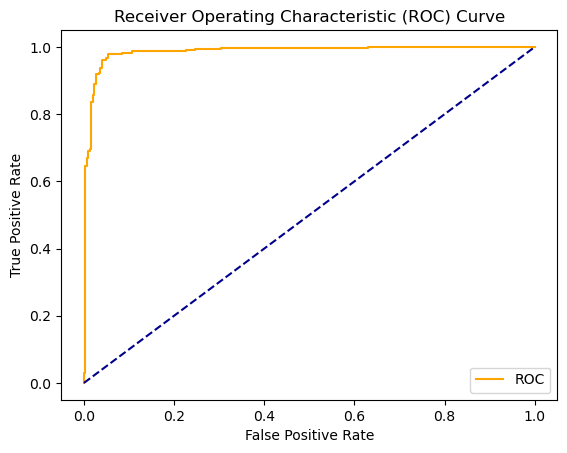

In [37]:
plot_roc_curve(fpr,tpr)